In [ ]:
import numpy as np
import pandas  as pd
import os
import matplotlib.pyplot as plt
from matplotlib import font_manager

from PIL import Image

from matplotlib.patches import Rectangle

# 设置字体 让图中可以显示中文
plt.rcParams['font.sans-serif'] = ['SimHei']
plt.rcParams['axes.unicode_minus'] = False



class Process_data():


    #初始化
    def __init__(self,path):

        self.path = path
        # 获取文件所有csv文件
        #self.dataframe_data = self.get_csv()
        #print(self.dataframe_data[0])

        #排序
        #self.sort_data = self.sort_value(self.dataframe_data[0],'item_length',False)

        #统计某一列每个值出现的次数
        #count_value = self.count_num_of_value(self.dataframe_data[0],'item_length')


    #获取文件夹所有csv文件
    def get_csv(self):
        record_data = []
        for root, directories, files in os.walk(self.path):
            for filename in files:
                file_path = os.path.join(root, filename)
                ##读取文件
                a = pd.read_csv(file_path)
                record_data.append(a)
        
        #初始化后打印第一个数据文件
        return record_data


    #对data数据sort_col列数据进行rule规则排序
    # 如果rule fasle为降序  true为升序
    def sort_value(self,data,sort_col,rule):
        #sort_data = b.sort_value(c[0],'item_length',False)
        A1_s = data.sort_values(by=[sort_col], ascending=rule)
        print('------------------------------------排序后的数据为-------------------------------')
        return A1_s


    #统计某一列每一个值出现的次数
    #data:dataframe
    #col：列名
    def count_num_of_value(self,data,col):
        ## count = b.count_num_of_value(sort_data,'item_length')
        value_counts = data[col].value_counts()
        print(f'------------------------------------统计{col}列每个值出现的次数')

        return value_counts


    #把seris 索引与值转换成列表
    def seris_to_list(self,data):
        #c = b.seris_to_list(count)
        data_index = data.index
        data_values = data.values
        record = []
        # 打印唯一值和相应的值
        for value, count in zip(data_index, data_values):
            record.append([value, count])

        #输出转化后的值
        print('------------------------------------转化Seriss数据为list')
        return record
    

    #根据数据绘制条形图
    def draw_Bar(self,x,y,x_label,y_label,title,draw_size):

        """
        #画条形图
        b.draw_Bar([ i for i in count.index],[j for j in count.values],'长/h','个数num','test',(6,6))

        """
        plt.figure(figsize=draw_size)
        plt.xlabel(x_label)
        plt.ylabel(y_label)

        plt.title(title)
        # 添加范围
        #plt.ylim(min(y)* 1.2, max(y))  # 设置y轴范围
        # 添加范围
        #plt.xlim(min(x)* 1.2, max(x))  # 设置y轴范围
        plt.bar(x,y)

        plt.show()


    # 根据数据绘制折线图
    def draw_chart(self,x,y,x_label,y_label,title,draw_size):

        """
        #画折线图
        b.draw_chart([ i for i in count.index],[j for j in count.values],'长/h','个数num','test',(6,6))

        """
        plt.figure(figsize=draw_size)
        plt.xlabel(x_label)
        plt.ylabel(y_label)

        plt.title(title)
        # 添加范围
        plt.ylim( 0 if min(y) > 0 else min(y) * 1.5, max(y)* 1.2)  # 设置y轴范围
        # 添加范围
        plt.xlim( 0 if min(x) > 0 else min(x) * 1.5, max(x)* 1.2)  # 设置y轴范围
        plt.plot(x,y)

        plt.show()


    # 对dataframe某一列分组 data为dataframe col为分组依据，show_data为数据来源
    # 获取对某列分组后的 索引 与 值 返回字典  key = index  value = 值
    def get_group(self,data,col,show_data):
        """
        d = b.get_group(c[0],'item_order',['item_length','item_width'])
        print(d.get('order205'))    
        """

        record = {}
        group = data.groupby(col)[show_data]
        print(group.ngroups)
        for i,j in group:
            record[i] = j.values
        return record
    
    
    # 绘制长方形 zuobiao为绘制长方形的信息
    def draw_cfx(self,zuobiao):

        # # 创建一个图形窗口
        # fig, ax = plt.subplots(figsize=(8, 8))

        # # 创建一个长方形对象 (0.7,0.5) 为长方形左下角坐标   0.4长, 0.5宽 color(R,G,B,透明度) 范围 0 - 1
        # #几个长方形对象画几个长方形
        
        # rectangle = [ Rectangle((0.7,0.5), 0.4, 0.5, fill=True, color=(0.0, 0.0, 1.0, 0.2)),
        #             Rectangle((0.5, 0.2), 0.2, 0.3, fill=True,color=(0.0, 0.0, 1.0, 0.11))]

        # # 将长方形添加到图形中
        # for i  in rectangle:
        #     ax.add_patch(i)

        # # # 设置图形的坐标轴范围
        # # ax.set_xlim(0, 1)
        # # ax.set_ylim(0, 1)

        # # 隐藏坐标轴
        # #ax.axis('off')  
        # # 显示图形
        # plt.show()
        fig, ax = plt.subplots(figsize=(8, 8))
        #长方形的左下角下标
        x,y = 0,0
        rectangle = []
        #透明度
        tmd = 0.15
        
        for i in range(4):
            
            rectangle.append(Rectangle((x,y), zuobiao[len(zuobiao)-i-1][0], zuobiao[len(zuobiao)-i-1][1], fill=True, color=(0.0, 0.0, 1.0, tmd)))
            tmd = tmd + 0.05
            #添加一个图像后 修改左下角坐标
            
            y = y + zuobiao[len(zuobiao)-i-1][1]

        #把图像添加到图片中
        for i  in rectangle:
            ax.add_patch(i)


        ax.set_xlim(0, 2440)
        ax.set_ylim(0, 1220)
        ax.axis('off') 
        plt.show()




path = '../规划模型/练习/2022-b/子问题1-数据集A/'
b = Process_data(path)
c = b.get_csv()

d = b.sort_value(c[0][['item_length','item_width']],'item_length',False)

e = d.values
b.draw_cfx(e)









In [ ]:
# 根据数据绘制折线图
import matplotlib.pyplot as plt
import numpy as np


"""
#画折线图
b.draw_chart([ i for i in count.index],[j for j in count.values],'长/h','个数num','test',(6,6))

"""
plt.figure(figsize=(8,8))
plt.xlabel('x_label')
plt.ylabel('y_label')

plt.title('title')
# 添加范围
plt.ylim(0,2440)  # 设置y轴范围
# 添加范围
plt.xlim(0,1220)  # 设置y轴范围
x = [0,1220]
y = [1220,1220]
plt.plot(x,y)

plt.show()



In [ ]:
import matplotlib.pyplot as plt

# 创建一个示例图形
fig, ax = plt.subplots()

# 隐藏上边框线和右边框线
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)



# 设置坐标范围
ax.set_xlim(0,100)
ax.set_ylim(0,100)

# 绘制一些示例数据
x = [0, 50,50,50]
y = [50, 50,50,0]

# 绘制交点
ax.scatter((50),(50), color='blue', marker='o')
ax.text(50 + 0.1, 50+ 0.1, f'Point {1}', fontsize=12)

#设置显示的坐标点 点0和点100
ax.set_xticks([0,100])
ax.set_yticks([0,100])

#设置显示坐标的的内容
custom_xtick_labels = ['0','(100,0)']
custom_ytick_labels = ['0','(0,100)']
#显示坐标的要显示的内容
ax.set_xticklabels(custom_xtick_labels)
ax.set_yticklabels(custom_xtick_labels)

ax.plot(x, y)

# 显示图形
plt.show()

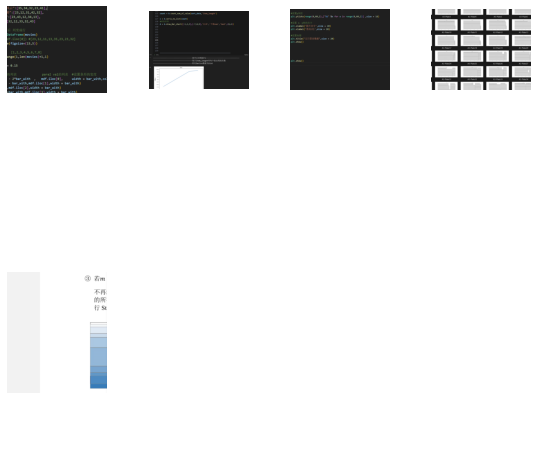

In [7]:
## 把文件夹里面的所有图片在plt显示出来
# 显示文件夹图片

# import matplotlib.pyplot as plt
import numpy as np
from PIL import Image
import pylab as plt
import os
# 文件夹路径
folder_path = '../规划模型/test_pic/'

# 获取文件夹中所有图像文件
image_files = [f for f in os.listdir(folder_path) if f.endswith(('.jpg', '.png', '.jpeg', '.gif', '.bmp'))]

# 创建一个空的图像列表
images = []

# 遍历图像文件并将它们添加到列表中
for image_file in image_files:
    img_path = os.path.join(folder_path, image_file)
    img = Image.open(img_path)
    images.append(img)

# 现在，images 列表包含了文件夹中的所有图像




# 创建子图
num_images = len(images)
num_cols = 4  # 每行显示2张图片
num_rows = (num_images + num_cols - 1) // num_cols

# 设置子图布局
fig, axes = plt.subplots(num_rows, num_cols, figsize=(8, 8))
fig.tight_layout()

yc_x = 0
yc_y = 0
# 显示每张图片
for i, image in enumerate(images):
    yc_x = i // num_cols
    yc_y = i % num_cols
    ax = axes[i // num_cols, i % num_cols]
    ax.imshow(image, cmap='gray')  # 使用灰度色彩映射
    ax.axis('off')  # 隐藏坐标轴

# ax = axes[1, 2]
# ax.axis('off')  # 隐藏坐标轴

#隐藏最后一行的所有坐标轴
if yc_y < num_cols - 1:
    for i in range(yc_y + 1,num_cols):
        ax = axes[yc_x, i]
        ax.axis('off')


# 显示图像
plt.show()











In [ ]:
#根据两列值的大小交换两列得值

import pandas as pd

# 创建一个示例的DataFrame
data = {'A': [10, 5,  8, 12, 3],
        'B': [ 6, 8, 11, 17, 0],
        'C': [ 2, 3,  4,  6,12]}
df = pd.DataFrame(data)

# 创建一个布尔条件，检查A列的值是否大于B列的值
condition = df['A'] > df['B']

# 使用.loc和布尔条件交换A列和B列的值
df.loc[condition, ['A', 'B']] = df.loc[condition, ['B', 'A']].to_numpy()

# 打印交换后的DataFrame
print(df)

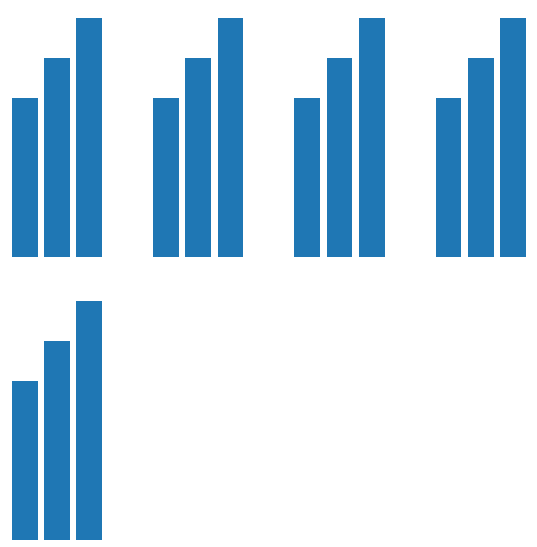

In [2]:
## 建立子图画图


## 把文件夹里面的所有图片在plt显示出来
# 显示文件夹图片

# import matplotlib.pyplot as plt
import pylab as plt
import numpy as np
from PIL import Image


"""
a = [1,2,3]
b = [4,5,6]
c = []
c.append(a)
c.append(b)
print(c)
d = []
d.append(c)
d.append(c)
print(d)

下面数据格式的制造方法
"""

# 子图的数据格式
a = [[[1,2,3],[4,5,6]],[[1,2,3],[4,5,6]],[[1,2,3],[4,5,6]],[[1,2,3],[4,5,6]],[[1,2,3],[4,5,6]]]

num_images = len(a)


num_cols = 4  # 4列
num_rows = (num_images + num_cols - 1) // num_cols

# 设置子图布局
fig, axes = plt.subplots(num_rows, num_cols, figsize=(8, 8))
fig.tight_layout()

yc_x = 0
yc_y = 0
# 显示每张图片
for i, image in enumerate(a):
    yc_x = i // num_cols
    yc_y = i % num_cols
    ax = axes[i // num_cols, i % num_cols]
    # 开始绘制子图
    ax.bar(image[0],image[1])
    ax.axis('off')  # 隐藏坐标轴

# ax = axes[1, 2]
# ax.axis('off')  # 隐藏坐标轴

#隐藏最后一行的所有坐标轴
if yc_y < num_cols - 1:
    for i in range(yc_y + 1,num_cols):
        ax = axes[yc_x, i]
        ax.axis('off')


# 显示图像
plt.show()














In [ ]:
# 画长方形且给标号
# import matplotlib.pyplot as plt
import matplotlib.patches as patches
import pylab as plt
# 创建一个新的图形
fig, ax = plt.subplots()

# 创建一个长方形
rectangle = patches.Rectangle((0.1, 0.1), 0.6, 0.3, linewidth=1, edgecolor='r', facecolor='none')

# 添加长方形到图形
ax.add_patch(rectangle)

# 添加标号 "1" 到长方形的中心
x_center = 0.1 + 0.6 / 2
y_center = 0.1 + 0.3 / 2
ax.text(x_center, y_center, "1", ha="center", va="center", fontsize=12, color="b")

# 设置坐标轴范围
ax.set_xlim(0, 1)
ax.set_ylim(0, 1)

# 显示图形
plt.show()

In [ ]:
# 矩阵公式
import numpy as np

a = np.array([[1,2,3],[4,5,6]])
print(a)
b = np.array([[1,2],[3,4],[5,6]])
c = np.array([[1,2,3]])
d = np.array([[9,8,7],[3,2,1]])

# 矩阵加法
sum = a + d
print(sum)

#数乘，矩阵乘
e = np.dot(a,b)

#元素乘  矩阵对应位置相乘
e = a * d

# 转置
e = c.T
print(e)
e = np.array([[1,2],[3,4]])

#逆矩阵
result = np.linalg.inv(e)
print(result)
#计算矩阵转行列式的值
result = np.linalg.det(e)
print(result)

#矩阵的秩
e = np.linalg.matrix_rank(d)
print(e)


